In [1]:
import numpy as np
# from Configurations import ContextConfig, Context, USNames
import Raw_stim
import Trrial
import iti
import Group
import model
import config
import matplotlib.pyplot as plt
import timeit

In [2]:
start_time = timeit.default_timer()

In [3]:
aa = [r"/Users/esthermulwa/soarn/Data/Test/triangle/threesome-g6d95f4e4e_1280.png"]
bb = [r"/Users/esthermulwa/soarn/Data/Test/circle/abstract-gb217e1131_1280.png"]
cc = [r"/Users/esthermulwa/soarn/Data/Test/square/nature-art-g4e075c2c9_1280.jpg"]
uss= [r"/Users/esthermulwa/soarn/Data/Test/circle/hawser-g15b8eb33f_1280.png"]
a_b= [r"/Users/esthermulwa/soarn/Data/Test/triangle/threesome-g6d95f4e4e_1280.png",
      r"/Users/esthermulwa/soarn/Data/Test/circle/abstract-gb217e1131_1280.png"]

In [4]:
A = Raw_stim.Stim(num_FM=3, symbol='A',  A = aa)
B = Raw_stim.Stim(num_FM=3, symbol='B',  B = bb)
US = Raw_stim.Stim(num_FM=3, symbol='+', US = uss)
# ct = Raw_stim.Stim(num_FM=2, symbol='\u03A9', ctx = cc)
# A.filter_maps.shape

In [5]:
A_config = config.CS(name='A', value1=0, value2=4, raw_data=A)
B_config = config.CS(name='B', value1=0, value2=4, raw_data =B)
US_config = config.CS(name='+', value1=0, value2=4, raw_data=US)
US_config_minus = config.CS(name='-', value1=0, value2=0, raw_data=US)
ctx_config = config.ContextConfig()
config.CS.US

config.CS.TOTAL
config.CS.ALL
ctx_config.OMEGA

{'Ω': Context('Ω', 0, 0)}

In [6]:
ctx_config.set_onset(0)
ctx_config.set_offset(5)

In [7]:
configural = {}
tim_obj = iti.TimingConfiguration(A = A_config,  B= B_config, us_plus = US_config, 
                                  ctx = ctx_config)
iti_obj = iti.ITIConfig()


temp = model.SORN()
temp.set_is_use_context(ctx=True)
temp.set_timing_per_trial(decision = True)
temp.setExternalSave(isExternalSave=True)

In [8]:
temp.set_GroupNo(g=1)
temp.set_PhaseNo(p=1)
temp.set_learning_rate(i = 1)
temp.set_reset_context(r = True)
temp.set_cs_cv(n = 1) 
temp.set_us_cv(n = 1)
temp.set_persistance(n= 0)
temp.set_skew(val=30)
temp.set_reset_value(r = 0.95)
temp.set_size(n = 5)
temp.set_us_scalar(n = 1.5)
temp.set_cs_scalar(n = 1.5)
temp.set_Intensity(i = 1)
temp.set_is_Errros(b1 = True, b2=True)

In [9]:
temp.update_values(name='+ - \u03B1+', phase=1, value=0.7)
temp.update_values(name='A - \u03B1r', phase=1, value=0.4)
temp.update_values(name='A - \u03B1n', phase= 1, value=0.4)
temp.update_values(name='B - \u03B1r', phase=1, value=0.40)
temp.update_values(name='B - \u03B1n', phase = 1, value=0.40)
temp.update_values(name='\u03A9 - \u03B1r', phase=1, value=0.20)
temp.update_values(name='\u03A9 - \u03B1n', phase =1, value=0.20)


#Salience
temp.update_values(name='-_s', phase=1, value=0.9)
temp.update_values(name='+_s', phase=1, value=1)
temp.update_values(name='A_s', phase=1, value = 0.3)
temp.update_values(name='B_s', phase = 1, value= 0.3)
temp.update_values(name='\u03A9_s',phase= 1, value= 0.01)


# model Parameters 
temp.update_values(name="gamma", phase=1, value= 0.10)
temp.update_values(name="Wave_k", phase=1, value= 0.10)
temp.update_values(name="ϑ", phase=1, value= 0.3)
temp.update_values(name="US \u03C1", phase=1, value= 0.9) #rho
temp.update_values(name="CS \u03C1", phase=1, value= 0.9) #rho
temp.update_values(name="delta", phase=1, value= 0.1)
temp.update_values(name="discount", phase=1, value= 0.9)
temp.update_values(name="ω", phase=1, value= 0.10)
temp.update_values(name="b", phase=1, value= 0.10) #backward discount
temp.update_values(name="common", phase=1, value= 0.10)


In [10]:
# GRP = Group.Grp(name='Grp1', num_phases=1, model=temp, A_stim = A, ctx = B, US_stim = US)
GRP = Group.Grp(name='Grp1', num_phases=1, model=temp, A = A_config, us_plus = US_config,
                 ctx = ctx_config)

In [11]:
GRP.set_total_trials(trials=100)
GRP.set_total_stimuli(stimuli=4)

In [12]:
GRP.add_phase(seq_of_stimulus="100A+", is_random=True,phase_num=1,is_configural_compounds=False, 
              configural_compounds_mapping= configural, timings=tim_obj, iti= iti_obj, context=ctx_config, 
              vartheta=True)


In [13]:
GRP.get_cue_map()

defaultdict(dict,
            {'Ω': <stimm.Stimulus at 0x7fb13887c0d0>,
             'A': <stimm.Stimulus at 0x7fb14ac26490>,
             '+': <stimm.Stimulus at 0x7fb14ac26d60>})

In [14]:
temp.addGroupIntoMap(name='Grp1', group=GRP)

In [15]:
temp.update_values_on_grps()
GRP.initialize_trial_arrays()

In [16]:
temp.initializeCommonMap()
temp.setCommonMap(None)
temp.commonMap
temp.proportions

{'Grp1': {'Ω': 0.0, 'A': 0.0, '+': 0.0}}

In [17]:
GRP.run()

haloo keita begining of computation algorithm dict_keys(['Ω', 'A', '+'])
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0

[7.22917292e-05 1.42393785e-03 3.67097658e-02]
aye
[7.22917292e-05 1.42393785e-03 9.14209275e-02]
aye
=========> 3
[9.95851898e-05 1.42393785e-03 9.14209275e-02]
aye
[9.95851898e-05 2.57389966e-03 9.14209275e-02]
aye
[9.95851898e-05 2.57389966e-03 1.60688348e-01]
aye
=========> 4
[7.46852228e-05 2.57389966e-03 1.60688348e-01]
aye
[7.46852228e-05 2.93386078e-03 1.60688348e-01]
aye
[7.46852228e-05 2.93386078e-03 1.75602526e-01]
aye
=========> 5
[7.43948132e-05 2.93386078e-03 1.75602526e-01]
aye
[7.43948132e-05 3.08201630e-03 1.75602526e-01]
aye
[7.43948132e-05 3.08201630e-03 1.83758516e-01]
aye
=========> 6
[5.78740624e-05 3.08201630e-03 1.83758516e-01]
aye
[5.78740624e-05 2.20288642e-03 1.83758516e-01]
aye
[5.78740624e-05 2.20288642e-03 1.27393387e-01]
aye
=========> 1
[5.50664572e-05 2.20288642e-03 1.27393387e-01]
aye
[5.50664572e-05 6.39215000e-04 1.27393387e-01]
aye
[5.50664572e-05 6.39215000e-04 4.08114820e-02]
aye
=========> 2
[0.00011432 0.00063921 0.04081148]
aye
[0.00011432 0.00

[9.70691423e-05 3.47540142e-03 2.83888442e-01]
aye
[9.70691423e-05 3.47540142e-03 1.91894566e-01]
aye
=========> 1
[9.30604648e-05 3.47540142e-03 1.91894566e-01]
aye
[9.30604648e-05 1.00283271e-03 1.91894566e-01]
aye
[9.30604648e-05 1.00283271e-03 6.57832290e-02]
aye
=========> 2
[0.00013914 0.00100283 0.06578323]
aye
[0.00013914 0.00250342 0.06578323]
aye
[1.39143283e-04 2.50341924e-03 1.62441619e-01]
aye
=========> 3
[0.0001992  0.00250342 0.16244162]
aye
[0.0001992  0.00452477 0.16244162]
aye
[1.99199168e-04 4.52477109e-03 2.77444958e-01]
aye
=========> 4
[1.27473610e-04 4.52477109e-03 2.77444958e-01]
aye
[1.27473610e-04 5.04823814e-03 2.77444958e-01]
aye
[1.27473610e-04 5.04823814e-03 2.86844866e-01]
aye
=========> 5
[1.35959193e-04 5.04823814e-03 2.86844866e-01]
aye
[1.35959193e-04 5.17412749e-03 2.86844866e-01]
aye
[1.35959193e-04 5.17412749e-03 2.89540314e-01]
aye
=========> 6
[1.12028660e-04 5.17412749e-03 2.89540314e-01]
aye
[1.12028660e-04 3.64001197e-03 2.89540314e-01]
aye
[

=========> 5
[1.60325079e-04 6.23239628e-03 3.45883188e-01]
aye
[1.60325079e-04 6.35179918e-03 3.45883188e-01]
aye
[1.60325079e-04 6.35179918e-03 3.49177536e-01]
aye
=========> 6
[1.23143971e-04 6.35179918e-03 3.49177536e-01]
aye
[1.23143971e-04 4.30404041e-03 3.49177536e-01]
aye
[1.23143971e-04 4.30404041e-03 2.21370412e-01]
aye
=========> 1
[1.24437018e-04 4.30404041e-03 2.21370412e-01]
aye
[1.24437018e-04 1.34329969e-03 2.21370412e-01]
aye
[0.00012444 0.0013433  0.09076558]
aye
=========> 2
[0.000167   0.0013433  0.09076558]
aye
[0.000167   0.00333967 0.09076558]
aye
[1.67000724e-04 3.33966976e-03 2.21697679e-01]
aye
=========> 3
[0.00024531 0.00333967 0.22169768]
aye
[0.00024531 0.00578107 0.22169768]
aye
[2.45306939e-04 5.78106950e-03 3.57081561e-01]
aye
=========> 4
[1.68776210e-04 5.78106950e-03 3.57081561e-01]
aye
[1.68776210e-04 6.31879486e-03 3.57081561e-01]
aye
[1.68776210e-04 6.31879486e-03 3.49439380e-01]
aye
=========> 5
[1.70193298e-04 6.31879486e-03 3.49439380e-01]
aye


[0.00026499 0.00657749 0.25038182]
aye
[2.64992193e-04 6.57748869e-03 4.03834736e-01]
aye
=========> 4
[1.91865154e-04 6.57748869e-03 4.03834736e-01]
aye
[1.91865154e-04 7.32752689e-03 4.03834736e-01]
aye
[1.91865154e-04 7.32752689e-03 3.88362173e-01]
aye
=========> 5
[1.92873428e-04 7.32752689e-03 3.88362173e-01]
aye
[1.92873428e-04 7.33319325e-03 3.88362173e-01]
aye
[1.92873428e-04 7.33319325e-03 3.90569050e-01]
aye
=========> 6
[1.48947269e-04 7.33319325e-03 3.90569050e-01]
aye
[1.48947269e-04 5.20370504e-03 3.90569050e-01]
aye
[1.48947269e-04 5.20370504e-03 2.50143943e-01]
aye
=========> 1
[1.33129542e-04 5.20370504e-03 2.50143943e-01]
aye
[1.33129542e-04 1.57507855e-03 2.50143943e-01]
aye
[0.00013313 0.00157508 0.10991613]
aye
=========> 2
[0.00017781 0.00157508 0.10991613]
aye
[0.00017781 0.00375378 0.10991613]
aye
[1.77809620e-04 3.75377505e-03 2.51416901e-01]
aye
=========> 3
[0.00026529 0.00375378 0.2514169 ]
aye
[0.00026529 0.00667041 0.2514169 ]
aye
[2.65289431e-04 6.6704115

[1.28189527e-04 1.66696444e-03 2.59842342e-01]
aye
[0.00012819 0.00166696 0.11514393]
aye
=========> 2
[0.00017519 0.00166696 0.11514393]
aye
[0.00017519 0.00409205 0.11514393]
aye
[1.75193131e-04 4.09205425e-03 2.69724266e-01]
aye
=========> 3
[2.68100741e-04 4.09205425e-03 2.69724266e-01]
aye
[2.68100741e-04 7.34405898e-03 2.69724266e-01]
aye
[2.68100741e-04 7.34405898e-03 4.36708897e-01]
aye
=========> 4
[1.99219151e-04 7.34405898e-03 4.36708897e-01]
aye
[1.99219151e-04 8.15602900e-03 4.36708897e-01]
aye
[1.99219151e-04 8.15602900e-03 4.10225913e-01]
aye
=========> 5
[1.98739689e-04 8.15602900e-03 4.10225913e-01]
aye
[1.98739689e-04 8.12888606e-03 4.10225913e-01]
aye
[1.98739689e-04 8.12888606e-03 4.11162258e-01]
aye
=========> 6
[1.52128022e-04 8.12888606e-03 4.11162258e-01]
aye
[1.52128022e-04 5.61251279e-03 4.11162258e-01]
aye
[1.52128022e-04 5.61251279e-03 2.58533607e-01]
aye
=========> 1
[1.27168889e-04 5.61251279e-03 2.58533607e-01]
aye
[1.27168889e-04 1.68978746e-03 2.5853360

[2.16350163e-04 8.64041849e-03 4.19904148e-01]
aye
=========> 5
[2.15784769e-04 8.64041849e-03 4.19904148e-01]
aye
[2.15784769e-04 8.58422530e-03 4.19904148e-01]
aye
[2.15784769e-04 8.58422530e-03 4.19764035e-01]
aye
=========> 6
[1.63194014e-04 8.58422530e-03 4.19764035e-01]
aye
[1.63194014e-04 5.85673978e-03 4.19764035e-01]
aye
[1.63194014e-04 5.85673978e-03 2.57800320e-01]
aye
=========> 1
[1.28148164e-04 5.85673978e-03 2.57800320e-01]
aye
[1.28148164e-04 1.78696248e-03 2.57800320e-01]
aye
[0.00012815 0.00178696 0.12222874]
aye
=========> 2
[0.00018067 0.00178696 0.12222874]
aye
[0.00018067 0.00420311 0.12222874]
aye
[1.80668270e-04 4.20311307e-03 2.85156774e-01]
aye
=========> 3
[2.78285150e-04 4.20311307e-03 2.85156774e-01]
aye
[2.78285150e-04 7.81044628e-03 2.85156774e-01]
aye
[2.78285150e-04 7.81044628e-03 4.53698869e-01]
aye
=========> 4
[2.14228547e-04 7.81044628e-03 4.53698869e-01]
aye
[2.14228547e-04 8.39554356e-03 4.53698869e-01]
aye
[2.14228547e-04 8.39554356e-03 4.1986278

=========> 2
[0.00019128 0.00187199 0.12863401]
aye
[0.00019128 0.00447591 0.12863401]
aye
[1.91279730e-04 4.47590899e-03 3.01256228e-01]
aye
=========> 3
[2.96776289e-04 4.47590899e-03 3.01256228e-01]
aye
[2.96776289e-04 8.23494237e-03 3.01256228e-01]
aye
[2.96776289e-04 8.23494237e-03 4.68656962e-01]
aye
=========> 4
[2.37438830e-04 8.23494237e-03 4.68656962e-01]
aye
[2.37438830e-04 8.95934127e-03 4.68656962e-01]
aye
[2.37438830e-04 8.95934127e-03 4.28615382e-01]
aye
=========> 5
[2.36799802e-04 8.95934127e-03 4.28615382e-01]
aye
[2.36799802e-04 9.02477817e-03 4.28615382e-01]
aye
[2.36799802e-04 9.02477817e-03 4.29953500e-01]
aye
=========> 6
[1.79390415e-04 9.02477817e-03 4.29953500e-01]
aye
[1.79390415e-04 6.20456214e-03 4.29953500e-01]
aye
[1.79390415e-04 6.20456214e-03 2.58934531e-01]
aye
=========> 1
[1.32142470e-04 6.20456214e-03 2.58934531e-01]
aye
[1.32142470e-04 1.62233088e-03 2.58934531e-01]
aye
[0.00013214 0.00162233 0.12845026]
aye
=========> 2
[0.00018954 0.00162233 0.12

[2.43844335e-04 9.34333899e-03 4.29643568e-01]
aye
[2.43844335e-04 9.34333899e-03 4.30146071e-01]
aye
=========> 6
[1.81504224e-04 9.34333899e-03 4.30146071e-01]
aye
[1.81504224e-04 6.35507774e-03 4.30146071e-01]
aye
[1.81504224e-04 6.35507774e-03 2.53669778e-01]
aye
=========> 1
[1.27562174e-04 6.35507774e-03 2.53669778e-01]
aye
[1.27562174e-04 1.61949424e-03 2.53669778e-01]
aye
[1.27562174e-04 1.61949424e-03 1.29463110e-01]
aye
=========> 2
[0.00018987 0.00161949 0.12946311]
aye
[0.00018987 0.00462651 0.12946311]
aye
[1.89865145e-04 4.62651057e-03 3.06959512e-01]
aye
=========> 3
[2.94035986e-04 4.62651057e-03 3.06959512e-01]
aye
[2.94035986e-04 8.34656221e-03 3.06959512e-01]
aye
[2.94035986e-04 8.34656221e-03 4.72562435e-01]
aye
=========> 4
[2.41861258e-04 8.34656221e-03 4.72562435e-01]
aye
[2.41861258e-04 9.34137502e-03 4.72562435e-01]
aye
[2.41861258e-04 9.34137502e-03 4.29492388e-01]
aye
=========> 5
[2.41197198e-04 9.34137502e-03 4.29492388e-01]
aye
[2.41197198e-04 9.34510765e-

=========> 2
[0.00018822 0.00161565 0.13034857]
aye
[0.00018822 0.00478276 0.13034857]
aye
[1.88219981e-04 4.78275773e-03 3.15262598e-01]
aye
=========> 3
[2.95940411e-04 4.78275773e-03 3.15262598e-01]
aye
[2.95940411e-04 8.66570203e-03 3.15262598e-01]
aye
[2.95940411e-04 8.66570203e-03 4.81506406e-01]
aye
=========> 4
[2.54517962e-04 8.66570203e-03 4.81506406e-01]
aye
[2.54517962e-04 9.70533255e-03 4.81506406e-01]
aye
[2.54517962e-04 9.70533255e-03 4.33636527e-01]
aye
=========> 5
[2.53913001e-04 9.70533255e-03 4.33636527e-01]
aye
[2.53913001e-04 9.79077378e-03 4.33636527e-01]
aye
[2.53913001e-04 9.79077378e-03 4.35287018e-01]
aye
=========> 6
[1.86560368e-04 9.79077378e-03 4.35287018e-01]
aye
[1.86560368e-04 6.61654736e-03 4.35287018e-01]
aye
[1.86560368e-04 6.61654736e-03 2.52029847e-01]
aye
=========> 1
[1.19264107e-04 6.61654736e-03 2.52029847e-01]
aye
[1.19264107e-04 1.62248831e-03 2.52029847e-01]
aye
[1.19264107e-04 1.62248831e-03 1.31763527e-01]
aye
=========> 2
[0.00018655 0.0

[2.61660238e-04 1.00195292e-02 4.33580293e-01]
aye
=========> 5
[2.61045136e-04 1.00195292e-02 4.33580293e-01]
aye
[2.61045136e-04 1.01009518e-02 4.33580293e-01]
aye
[2.61045136e-04 1.01009518e-02 4.35203622e-01]
aye
=========> 6
[1.90953153e-04 1.01009518e-02 4.35203622e-01]
aye
[1.90953153e-04 6.76511542e-03 4.35203622e-01]
aye
[1.90953153e-04 6.76511542e-03 2.47286438e-01]
aye
=========> 1
[1.20901446e-04 6.76511542e-03 2.47286438e-01]
aye
[1.20901446e-04 1.67257801e-03 2.47286438e-01]
aye
[1.20901446e-04 1.67257801e-03 1.37290992e-01]
aye
=========> 2
[0.00019092 0.00167258 0.13729099]
aye
[0.00019092 0.00504708 0.13729099]
aye
[1.90924117e-04 5.04707791e-03 3.27882061e-01]
aye
=========> 3
[2.98948562e-04 5.04707791e-03 3.27882061e-01]
aye
[2.98948562e-04 9.12335984e-03 3.27882061e-01]
aye
[2.98948562e-04 9.12335984e-03 4.93580684e-01]
aye
=========> 4
[2.58776187e-04 9.12335984e-03 4.93580684e-01]
aye
[2.58776187e-04 1.00823703e-02 4.93580684e-01]
aye
[2.58776187e-04 1.00823703e-

[1.16846416e-04 1.69217169e-03 2.49465292e-01]
aye
[1.16846416e-04 1.69217169e-03 1.37571058e-01]
aye
=========> 2
[0.00018883 0.00169217 0.13757106]
aye
[0.00018883 0.00517815 0.13757106]
aye
[1.88830466e-04 5.17815147e-03 3.27814373e-01]
aye
=========> 3
[3.03051397e-04 5.17815147e-03 3.27814373e-01]
aye
[3.03051397e-04 9.41365629e-03 3.27814373e-01]
aye
[3.03051397e-04 9.41365629e-03 4.93656367e-01]
aye
=========> 4
[2.74715535e-04 9.41365629e-03 4.93656367e-01]
aye
[2.74715535e-04 1.06058374e-02 4.93656367e-01]
aye
[2.74715535e-04 1.06058374e-02 4.37375577e-01]
aye
=========> 5
[2.74105226e-04 1.06058374e-02 4.37375577e-01]
aye
[2.74105226e-04 1.06401702e-02 4.37375577e-01]
aye
[2.74105226e-04 1.06401702e-02 4.37784010e-01]
aye
=========> 6
[2.02414318e-04 1.06401702e-02 4.37784010e-01]
aye
[2.02414318e-04 7.17480109e-03 4.37784010e-01]
aye
[2.02414318e-04 7.17480109e-03 2.47823747e-01]
aye
=========> 1
[1.15568426e-04 7.17480109e-03 2.47823747e-01]
aye
[1.15568426e-04 1.67779108e-

In [18]:
y = GRP.get_cue_map()['A'].get_trial_average_weights_a(trial_type =0
                                                   , phase = 0)
y.shape

zero = np.zeros(4)

y =np.vstack([zero, y])

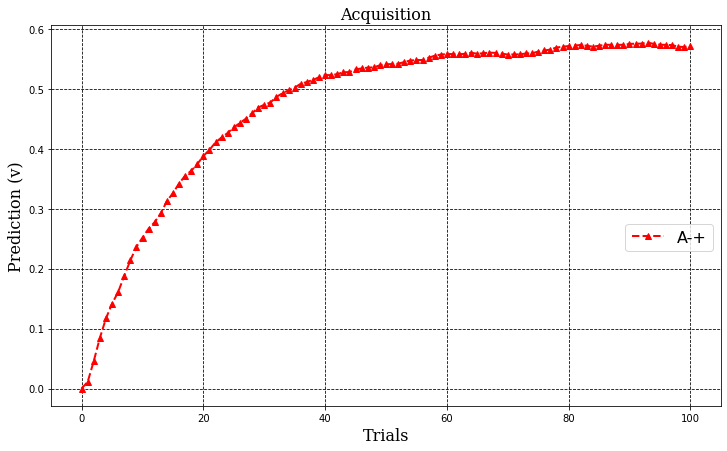

In [19]:
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }
plt.figure(figsize=(12,7))
plot = plt.subplot()

# plot.plot(y[:,0], label= "A-Ω", linewidth = 1, color='green', linestyle='dashed', marker='.' )
# plot.plot(yy[:,2], label = "B-+", linewidth = 2, color='b', linestyle='dashdot', marker='.')
plot.plot(y[:,2], label = "A-+", linewidth = 2, color='r', linestyle='dashed', marker='^')
plot.legend(bbox_to_anchor=(1, 0.5), prop={'size': 16})

# plt.plot(z[:,3])
# plt.plot(z[:,0])
# plt.plot(z[:,2])
# Function to plot 


# Function add a legend 
plt.title("Acquisition", fontdict=font)
plt.xlabel("Trials", fontdict=font)
plt.ylabel('Prediction (v)', fontdict=font)
plt.grid(True, linestyle = '--', color = 'black')

# function to show the plot 
plt.show()

In [20]:
# code you want to evaluate
elapsed = timeit.default_timer() - start_time
elapsed

2881.989541625

In [38]:
sub = GRP.get_cue_map()['A'].get_finale_wts()
ele_0 = np.asarray(sub[0])
ele_0.shape

##############

subus = GRP.get_cue_map()['+'].get_finale_wts()
ele_0us = np.asarray(subus[0])
# ele_0us

In [39]:

#Initial filter_maps from the conv layer 
stim_pred = A.filter_maps
stim_pred = stim_pred.flatten()

activations  = GRP.activate_test('A')
acti_0 = np.asarray(activations[0])
acti_0.shape
stim_pred = stim_pred*acti_0

######################

stim_predus = US.filter_maps
stim_predus = stim_predus.flatten()

activationsus  = GRP.activate_test('+')
acti_0us = np.asarray(activationsus[0])
acti_0us.shape
stim_pred.shape
stim_predus = stim_predus*acti_0us
stim_predus

AttributeError: filter_maps

In [52]:
# Extract weights to the US
US_images_wts = ele_0[:,2, :]
US_images_wts.shape
# US_images

US_images_wtsus = ele_0us[:,2, :]
US_images_wtsus.shape

(12544, 5)

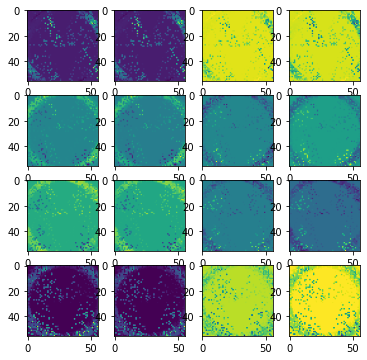

In [53]:
# figure showing the predicted value
fig, axes = plt.subplots(4,4, figsize=(6,6))
for i in range(4): #Columns repping the trial time 
    for j in range(4): #Rows repping the convolution maps
        y = (((stim_pred* US_images_wts[:,i])+(stim_predus* US_images_wts[:,i]))).reshape(4, 56, 56)[j]
        axes[j][i].imshow(y)
#         axes[j][i].imshow((stim_pred* US_images_wts[:,i]).reshape(4, 56, 56)[j])

AttributeError: filter_maps

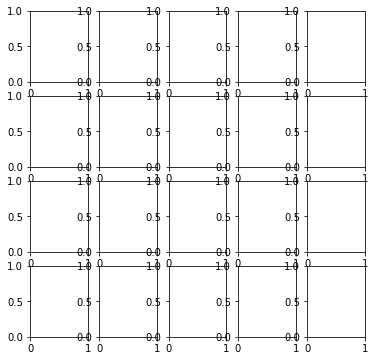

In [42]:
# original Stim value
fig, axes = plt.subplots(4,5, figsize=(6,6))
for i in range(5):
    for j in range(4):
        axes[j][i].imshow((A.filter_maps).reshape(4, 56, 56)[j])
# yy.shape

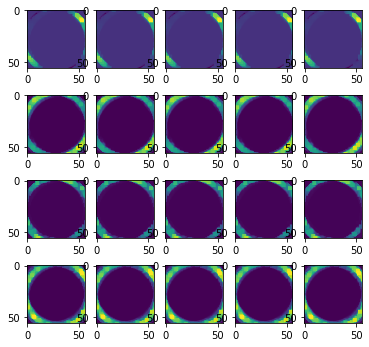

In [43]:
# original US value
fig, axes = plt.subplots(4,5, figsize=(6,6))
for i in range(5):
    for j in range(4):
        axes[j][i].imshow((US.filter_maps)[j])
# yy.shape

In [44]:
# aa = [r"/Users/esthermulwa/soarn/Data/Test/triangle/threesome-g6d95f4e4e_1280.png"]
# bb = [r"/Users/esthermulwa/soarn/Data/Test/circle/abstract-gb217e1131_1280.png"]
# cc = [r"/Users/esthermulwa/soarn/Data/Test/square/nature-art-g4e075c2c9_1280.jpg"]
# uss= [r"/Users/esthermulwa/soarn/Data/Test/circle/hawser-g15b8eb33f_1280.png"]
# Imports PIL module
from PIL import Image
from IPython.display import display # to display images

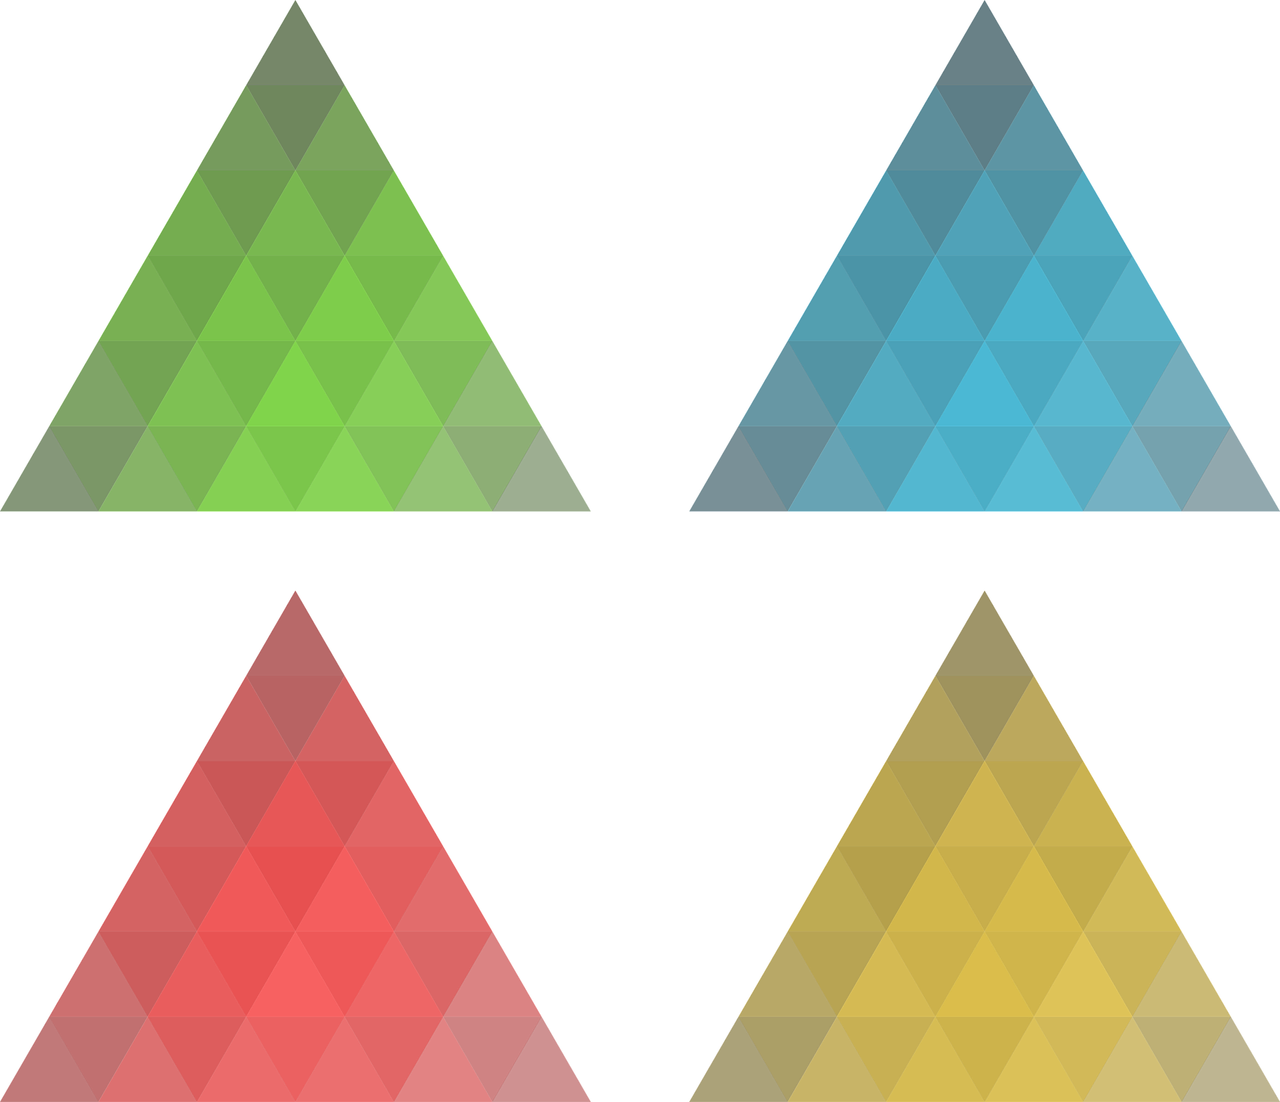

In [28]:
A = Image.open(r"/Users/esthermulwa/soarn/Data/Test/triangle/threesome-g6d95f4e4e_1280.png")

# This method will show image in any image viewer
display(A)

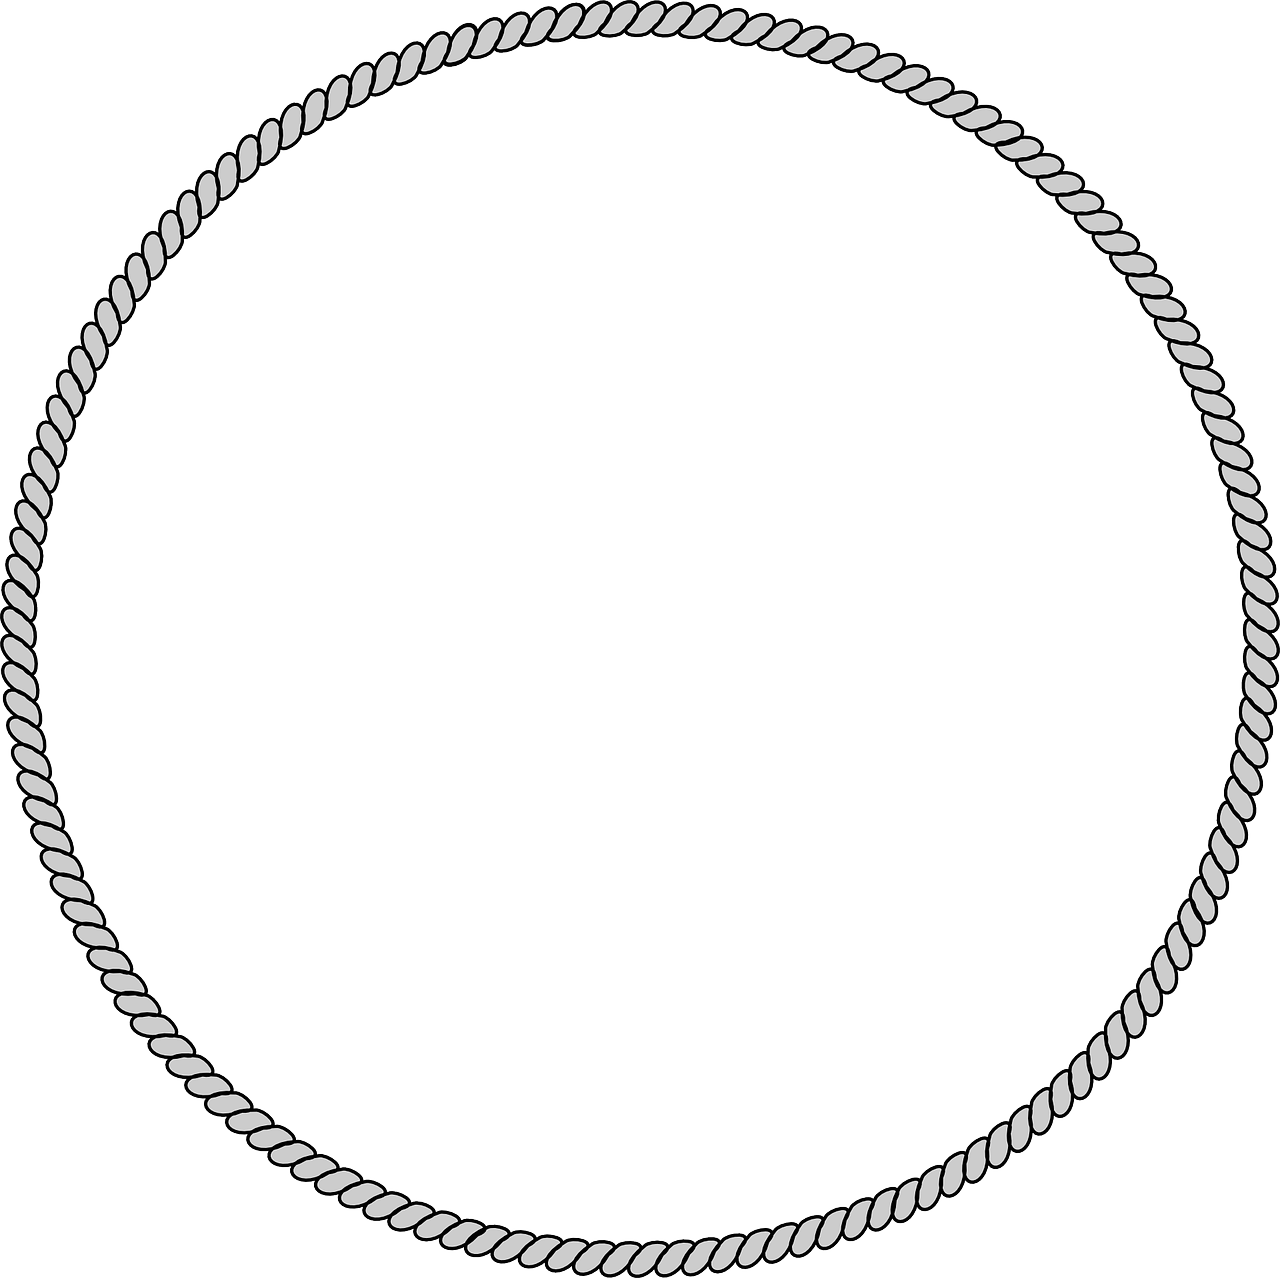

In [29]:
us = Image.open(r"/Users/esthermulwa/soarn/Data/Test/circle/hawser-g15b8eb33f_1280.png")

# This method will show image in any image viewer
display(us)